In [2]:
import numpy as np 
import pandas as pd

In [3]:
csv_file = '~/Documents/uni/y3s1/19S1-CE4042-CZ4042-NEURAL NETWORK  DEEP LEARNING/Content/assignment1/admission_predict.csv'

df = pd.read_csv(csv_file, index_col=[0])

In [4]:
df.shape

(400, 8)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


## Data Preperation

In [6]:
from sklearn.model_selection import train_test_split

seed = 10

np.random.seed(seed)

data = df.values
np.random.shuffle(data)

X = data[:, :-1]
y = data[:, -1].reshape(-1,1)

def scale(X, decimals):
    return np.round((X - np.mean(X, axis=0))/ np.std(X, axis=0), decimals=decimals)

X = scale(X, 4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 7), (120, 7), (280, 1), (120, 1))

## Define all libraries and functions needed

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras.regularizers import l2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



## Q1

Train on 280 samples, validate on 120 samples
Epoch 1/10000
280/280 [==============================] - 0s 641us/step - loss: 1.0004 - val_loss: 0.7057
Epoch 2/10000
280/280 [==============================] - 0s 142us/step - loss: 0.5902 - val_loss: 0.4809
Epoch 3/10000
280/280 [==============================] - 0s 114us/step - loss: 0.4269 - val_loss: 0.3780
Epoch 4/10000
280/280 [==============================] - 0s 144us/step - loss: 0.3488 - val_loss: 0.3198
Epoch 5/10000
280/280 [==============================] - 0s 125us/step - loss: 0.3022 - val_loss: 0.2814
Epoch 6/10000
280/280 [==============================] - 0s 115us/step - loss: 0.2705 - val_loss: 0.2546
Epoch 7/10000
280/280 [==============================] - 0s 107us/step - loss: 0.2472 - val_loss: 0.2339
Epoch 8/10000
280/280 [==============================] - 0s 112us/step - loss: 0.2292 - val_loss: 0.2178
Epoch 9/10000
280/280 [==============================] - 0s 114us/step - loss: 0.2147 - val_loss: 0.2047
Epoch 10/

Epoch 78/10000
280/280 [==============================] - 0s 160us/step - loss: 0.0462 - val_loss: 0.0499
Epoch 79/10000
280/280 [==============================] - 0s 171us/step - loss: 0.0458 - val_loss: 0.0494
Epoch 80/10000
280/280 [==============================] - 0s 145us/step - loss: 0.0453 - val_loss: 0.0489
Epoch 81/10000
280/280 [==============================] - 0s 147us/step - loss: 0.0448 - val_loss: 0.0484
Epoch 82/10000
280/280 [==============================] - 0s 153us/step - loss: 0.0444 - val_loss: 0.0480
Epoch 83/10000
280/280 [==============================] - 0s 123us/step - loss: 0.0439 - val_loss: 0.0475
Epoch 84/10000
280/280 [==============================] - 0s 107us/step - loss: 0.0435 - val_loss: 0.0471
Epoch 85/10000
280/280 [==============================] - 0s 117us/step - loss: 0.0431 - val_loss: 0.0466
Epoch 86/10000
280/280 [==============================] - 0s 108us/step - loss: 0.0427 - val_loss: 0.0462
Epoch 87/10000
280/280 [======================

280/280 [==============================] - 0s 107us/step - loss: 0.0284 - val_loss: 0.0312
Epoch 155/10000
280/280 [==============================] - 0s 107us/step - loss: 0.0283 - val_loss: 0.0310
Epoch 156/10000
280/280 [==============================] - 0s 121us/step - loss: 0.0282 - val_loss: 0.0309
Epoch 157/10000
280/280 [==============================] - 0s 111us/step - loss: 0.0281 - val_loss: 0.0308
Epoch 158/10000
280/280 [==============================] - 0s 118us/step - loss: 0.0280 - val_loss: 0.0307
Epoch 159/10000
280/280 [==============================] - 0s 115us/step - loss: 0.0279 - val_loss: 0.0306
Epoch 160/10000
280/280 [==============================] - 0s 131us/step - loss: 0.0278 - val_loss: 0.0305
Epoch 161/10000
280/280 [==============================] - 0s 157us/step - loss: 0.0277 - val_loss: 0.0304
Epoch 162/10000
280/280 [==============================] - 0s 137us/step - loss: 0.0276 - val_loss: 0.0303
Epoch 163/10000
280/280 [============================

280/280 [==============================] - 0s 122us/step - loss: 0.0230 - val_loss: 0.0252
Epoch 231/10000
280/280 [==============================] - 0s 112us/step - loss: 0.0230 - val_loss: 0.0252
Epoch 232/10000
280/280 [==============================] - 0s 136us/step - loss: 0.0229 - val_loss: 0.0251
Epoch 233/10000
280/280 [==============================] - 0s 113us/step - loss: 0.0229 - val_loss: 0.0251
Epoch 234/10000
280/280 [==============================] - 0s 110us/step - loss: 0.0228 - val_loss: 0.0250
Epoch 235/10000
280/280 [==============================] - 0s 106us/step - loss: 0.0228 - val_loss: 0.0250
Epoch 236/10000
280/280 [==============================] - 0s 108us/step - loss: 0.0227 - val_loss: 0.0249
Epoch 237/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0227 - val_loss: 0.0249
Epoch 238/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0227 - val_loss: 0.0248
Epoch 239/10000
280/280 [============================

Epoch 307/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0203 - val_loss: 0.0223
Epoch 308/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0203 - val_loss: 0.0223
Epoch 309/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0203 - val_loss: 0.0223
Epoch 310/10000
280/280 [==============================] - 0s 106us/step - loss: 0.0202 - val_loss: 0.0222
Epoch 311/10000
280/280 [==============================] - 0s 106us/step - loss: 0.0202 - val_loss: 0.0222
Epoch 312/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0202 - val_loss: 0.0222
Epoch 313/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0202 - val_loss: 0.0222
Epoch 314/10000
280/280 [==============================] - 0s 111us/step - loss: 0.0201 - val_loss: 0.0221
Epoch 315/10000
280/280 [==============================] - 0s 111us/step - loss: 0.0201 - val_loss: 0.0221
Epoch 316/10000
280/280 [================

280/280 [==============================] - 0s 91us/step - loss: 0.0187 - val_loss: 0.0206
Epoch 385/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0187 - val_loss: 0.0206
Epoch 386/10000
280/280 [==============================] - 0s 118us/step - loss: 0.0187 - val_loss: 0.0206
Epoch 387/10000
280/280 [==============================] - 0s 116us/step - loss: 0.0186 - val_loss: 0.0205
Epoch 388/10000
280/280 [==============================] - 0s 121us/step - loss: 0.0186 - val_loss: 0.0205
Epoch 389/10000
280/280 [==============================] - 0s 117us/step - loss: 0.0186 - val_loss: 0.0205
Epoch 390/10000
280/280 [==============================] - 0s 116us/step - loss: 0.0186 - val_loss: 0.0205
Epoch 391/10000
280/280 [==============================] - 0s 117us/step - loss: 0.0186 - val_loss: 0.0205
Epoch 392/10000
280/280 [==============================] - 0s 112us/step - loss: 0.0186 - val_loss: 0.0205
Epoch 393/10000
280/280 [==============================

280/280 [==============================] - 0s 88us/step - loss: 0.0176 - val_loss: 0.0194
Epoch 462/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0176 - val_loss: 0.0194
Epoch 463/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0176 - val_loss: 0.0194
Epoch 464/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0176 - val_loss: 0.0194
Epoch 465/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0176 - val_loss: 0.0194
Epoch 466/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0175 - val_loss: 0.0194
Epoch 467/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0175 - val_loss: 0.0194
Epoch 468/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0175 - val_loss: 0.0193
Epoch 469/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0175 - val_loss: 0.0193
Epoch 470/10000
280/280 [==============================] - 0s 

280/280 [==============================] - 0s 84us/step - loss: 0.0168 - val_loss: 0.0186
Epoch 539/10000
280/280 [==============================] - 0s 125us/step - loss: 0.0168 - val_loss: 0.0186
Epoch 540/10000
280/280 [==============================] - 0s 112us/step - loss: 0.0168 - val_loss: 0.0186
Epoch 541/10000
280/280 [==============================] - ETA: 0s - loss: 0.011 - 0s 109us/step - loss: 0.0168 - val_loss: 0.0186
Epoch 542/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0168 - val_loss: 0.0185
Epoch 543/10000
280/280 [==============================] - 0s 101us/step - loss: 0.0168 - val_loss: 0.0185
Epoch 544/10000
280/280 [==============================] - 0s 109us/step - loss: 0.0167 - val_loss: 0.0185
Epoch 545/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0167 - val_loss: 0.0185
Epoch 546/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0167 - val_loss: 0.0185
Epoch 547/10000
280/280 [=======

Epoch 615/10000
280/280 [==============================] - 0s 115us/step - loss: 0.0162 - val_loss: 0.0179
Epoch 616/10000
280/280 [==============================] - 0s 109us/step - loss: 0.0162 - val_loss: 0.0179
Epoch 617/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0162 - val_loss: 0.0179
Epoch 618/10000
280/280 [==============================] - 0s 97us/step - loss: 0.0162 - val_loss: 0.0179
Epoch 619/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0162 - val_loss: 0.0179
Epoch 620/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0161 - val_loss: 0.0179
Epoch 621/10000
280/280 [==============================] - 0s 101us/step - loss: 0.0161 - val_loss: 0.0179
Epoch 622/10000
280/280 [==============================] - 0s 97us/step - loss: 0.0161 - val_loss: 0.0179
Epoch 623/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0161 - val_loss: 0.0179
Epoch 624/10000
280/280 [==============

280/280 [==============================] - 0s 88us/step - loss: 0.0157 - val_loss: 0.0174
Epoch 693/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0157 - val_loss: 0.0174
Epoch 694/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0157 - val_loss: 0.0174
Epoch 695/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0157 - val_loss: 0.0174
Epoch 696/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0157 - val_loss: 0.0174
Epoch 697/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0157 - val_loss: 0.0174
Epoch 698/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0157 - val_loss: 0.0174
Epoch 699/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0157 - val_loss: 0.0174
Epoch 700/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0156 - val_loss: 0.0174
Epoch 701/10000
280/280 [==============================] - 0s 

280/280 [==============================] - 0s 88us/step - loss: 0.0153 - val_loss: 0.0170
Epoch 770/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0153 - val_loss: 0.0170
Epoch 771/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0153 - val_loss: 0.0170
Epoch 772/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0153 - val_loss: 0.0170
Epoch 773/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0153 - val_loss: 0.0170
Epoch 774/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0153 - val_loss: 0.0170
Epoch 775/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0153 - val_loss: 0.0170
Epoch 776/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0153 - val_loss: 0.0170
Epoch 777/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0153 - val_loss: 0.0170
Epoch 778/10000
280/280 [==============================] - 0s 

280/280 [==============================] - 0s 89us/step - loss: 0.0149 - val_loss: 0.0167
Epoch 847/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0149 - val_loss: 0.0167
Epoch 848/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0149 - val_loss: 0.0167
Epoch 849/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0149 - val_loss: 0.0167
Epoch 850/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0149 - val_loss: 0.0167
Epoch 851/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0149 - val_loss: 0.0167
Epoch 852/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0149 - val_loss: 0.0167
Epoch 853/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0149 - val_loss: 0.0167
Epoch 854/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0149 - val_loss: 0.0167
Epoch 855/10000
280/280 [==============================] - 0s 

280/280 [==============================] - 0s 89us/step - loss: 0.0146 - val_loss: 0.0164
Epoch 924/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0146 - val_loss: 0.0164
Epoch 925/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0146 - val_loss: 0.0164
Epoch 926/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0146 - val_loss: 0.0164
Epoch 927/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0146 - val_loss: 0.0164
Epoch 928/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0146 - val_loss: 0.0164
Epoch 929/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0146 - val_loss: 0.0164
Epoch 930/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0146 - val_loss: 0.0164
Epoch 931/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0146 - val_loss: 0.0164
Epoch 932/10000
280/280 [==============================] - 0s 

280/280 [==============================] - 0s 87us/step - loss: 0.0144 - val_loss: 0.0161
Epoch 1001/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0144 - val_loss: 0.0161
Epoch 1002/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0144 - val_loss: 0.0161
Epoch 1003/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0144 - val_loss: 0.0161
Epoch 1004/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0144 - val_loss: 0.0161
Epoch 1005/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0144 - val_loss: 0.0161
Epoch 1006/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0144 - val_loss: 0.0161
Epoch 1007/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0144 - val_loss: 0.0161
Epoch 1008/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0144 - val_loss: 0.0161
Epoch 1009/10000
280/280 [============================

280/280 [==============================] - 0s 86us/step - loss: 0.0141 - val_loss: 0.0159
Epoch 1077/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0141 - val_loss: 0.0159
Epoch 1078/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0141 - val_loss: 0.0159
Epoch 1079/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0141 - val_loss: 0.0159
Epoch 1080/10000
280/280 [==============================] - 0s 81us/step - loss: 0.0141 - val_loss: 0.0159
Epoch 1081/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0141 - val_loss: 0.0159
Epoch 1082/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0141 - val_loss: 0.0159
Epoch 1083/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0141 - val_loss: 0.0159
Epoch 1084/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0141 - val_loss: 0.0159
Epoch 1085/10000
280/280 [============================

280/280 [==============================] - 0s 87us/step - loss: 0.0139 - val_loss: 0.0157
Epoch 1153/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0139 - val_loss: 0.0157
Epoch 1154/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0139 - val_loss: 0.0157
Epoch 1155/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0139 - val_loss: 0.0157
Epoch 1156/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0139 - val_loss: 0.0157
Epoch 1157/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0139 - val_loss: 0.0157
Epoch 1158/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0139 - val_loss: 0.0157
Epoch 1159/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0139 - val_loss: 0.0157
Epoch 1160/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0139 - val_loss: 0.0157
Epoch 1161/10000
280/280 [============================

280/280 [==============================] - 0s 87us/step - loss: 0.0137 - val_loss: 0.0155
Epoch 1229/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0137 - val_loss: 0.0155
Epoch 1230/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0137 - val_loss: 0.0155
Epoch 1231/10000
280/280 [==============================] - 0s 83us/step - loss: 0.0137 - val_loss: 0.0155
Epoch 1232/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0137 - val_loss: 0.0155
Epoch 1233/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0137 - val_loss: 0.0155
Epoch 1234/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0137 - val_loss: 0.0155
Epoch 1235/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0137 - val_loss: 0.0155
Epoch 1236/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0137 - val_loss: 0.0155
Epoch 1237/10000
280/280 [============================

280/280 [==============================] - 0s 85us/step - loss: 0.0135 - val_loss: 0.0153
Epoch 1305/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0135 - val_loss: 0.0153
Epoch 1306/10000
280/280 [==============================] - 0s 83us/step - loss: 0.0135 - val_loss: 0.0153
Epoch 1307/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0135 - val_loss: 0.0153
Epoch 1308/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0135 - val_loss: 0.0153
Epoch 1309/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0135 - val_loss: 0.0153
Epoch 1310/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0135 - val_loss: 0.0153
Epoch 1311/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0135 - val_loss: 0.0153
Epoch 1312/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0135 - val_loss: 0.0153
Epoch 1313/10000
280/280 [============================

280/280 [==============================] - 0s 86us/step - loss: 0.0134 - val_loss: 0.0151
Epoch 1381/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0134 - val_loss: 0.0151
Epoch 1382/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0134 - val_loss: 0.0151
Epoch 1383/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0133 - val_loss: 0.0151
Epoch 1384/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0133 - val_loss: 0.0151
Epoch 1385/10000
280/280 [==============================] - 0s 83us/step - loss: 0.0133 - val_loss: 0.0151
Epoch 1386/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0133 - val_loss: 0.0151
Epoch 1387/10000
280/280 [==============================] - 0s 82us/step - loss: 0.0133 - val_loss: 0.0151
Epoch 1388/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0133 - val_loss: 0.0151
Epoch 1389/10000
280/280 [============================

280/280 [==============================] - 0s 87us/step - loss: 0.0132 - val_loss: 0.0150
Epoch 1457/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0132 - val_loss: 0.0149
Epoch 1458/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0132 - val_loss: 0.0149
Epoch 1459/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0132 - val_loss: 0.0149
Epoch 1460/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0132 - val_loss: 0.0149
Epoch 1461/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0132 - val_loss: 0.0149
Epoch 1462/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0132 - val_loss: 0.0149
Epoch 1463/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0132 - val_loss: 0.0149
Epoch 1464/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0132 - val_loss: 0.0149
Epoch 1465/10000
280/280 [============================

280/280 [==============================] - 0s 88us/step - loss: 0.0130 - val_loss: 0.0148
Epoch 1533/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0130 - val_loss: 0.0148
Epoch 1534/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0130 - val_loss: 0.0148
Epoch 1535/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0130 - val_loss: 0.0148
Epoch 1536/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0130 - val_loss: 0.0148
Epoch 1537/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0130 - val_loss: 0.0148
Epoch 1538/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0130 - val_loss: 0.0148
Epoch 1539/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0130 - val_loss: 0.0148
Epoch 1540/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0130 - val_loss: 0.0148
Epoch 1541/10000
280/280 [============================

280/280 [==============================] - 0s 89us/step - loss: 0.0129 - val_loss: 0.0146
Epoch 1609/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0129 - val_loss: 0.0146
Epoch 1610/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0129 - val_loss: 0.0146
Epoch 1611/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0129 - val_loss: 0.0146
Epoch 1612/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0129 - val_loss: 0.0146
Epoch 1613/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0129 - val_loss: 0.0146
Epoch 1614/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0129 - val_loss: 0.0146
Epoch 1615/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0129 - val_loss: 0.0146
Epoch 1616/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0129 - val_loss: 0.0146
Epoch 1617/10000
280/280 [============================

280/280 [==============================] - 0s 88us/step - loss: 0.0127 - val_loss: 0.0145
Epoch 1685/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0127 - val_loss: 0.0145
Epoch 1686/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0127 - val_loss: 0.0145
Epoch 1687/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0127 - val_loss: 0.0145
Epoch 1688/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0127 - val_loss: 0.0145
Epoch 1689/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0127 - val_loss: 0.0145
Epoch 1690/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0127 - val_loss: 0.0145
Epoch 1691/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0127 - val_loss: 0.0145
Epoch 1692/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0127 - val_loss: 0.0145
Epoch 1693/10000
280/280 [============================

280/280 [==============================] - 0s 85us/step - loss: 0.0126 - val_loss: 0.0144
Epoch 1761/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0126 - val_loss: 0.0144
Epoch 1762/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0126 - val_loss: 0.0144
Epoch 1763/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0126 - val_loss: 0.0144
Epoch 1764/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0126 - val_loss: 0.0144
Epoch 1765/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0126 - val_loss: 0.0144
Epoch 1766/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0126 - val_loss: 0.0144
Epoch 1767/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0126 - val_loss: 0.0144
Epoch 1768/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0126 - val_loss: 0.0144
Epoch 1769/10000
280/280 [============================

280/280 [==============================] - 0s 106us/step - loss: 0.0125 - val_loss: 0.0142
Epoch 1837/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0125 - val_loss: 0.0142
Epoch 1838/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0125 - val_loss: 0.0142
Epoch 1839/10000
280/280 [==============================] - 0s 101us/step - loss: 0.0125 - val_loss: 0.0142
Epoch 1840/10000
280/280 [==============================] - 0s 111us/step - loss: 0.0125 - val_loss: 0.0142
Epoch 1841/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0125 - val_loss: 0.0142
Epoch 1842/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0125 - val_loss: 0.0142
Epoch 1843/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0125 - val_loss: 0.0142
Epoch 1844/10000
280/280 [==============================] - 0s 117us/step - loss: 0.0125 - val_loss: 0.0142
Epoch 1845/10000
280/280 [===================

280/280 [==============================] - 0s 87us/step - loss: 0.0123 - val_loss: 0.0141
Epoch 1913/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0123 - val_loss: 0.0141
Epoch 1914/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0123 - val_loss: 0.0141
Epoch 1915/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0123 - val_loss: 0.0141
Epoch 1916/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0123 - val_loss: 0.0141
Epoch 1917/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0123 - val_loss: 0.0141
Epoch 1918/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0123 - val_loss: 0.0141
Epoch 1919/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0123 - val_loss: 0.0141
Epoch 1920/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0123 - val_loss: 0.0141
Epoch 1921/10000
280/280 [============================

280/280 [==============================] - 0s 85us/step - loss: 0.0122 - val_loss: 0.0140
Epoch 1989/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0122 - val_loss: 0.0140
Epoch 1990/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0122 - val_loss: 0.0140
Epoch 1991/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0122 - val_loss: 0.0140
Epoch 1992/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0122 - val_loss: 0.0140
Epoch 1993/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0122 - val_loss: 0.0140
Epoch 1994/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0122 - val_loss: 0.0140
Epoch 1995/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0122 - val_loss: 0.0140
Epoch 1996/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0122 - val_loss: 0.0140
Epoch 1997/10000
280/280 [============================

280/280 [==============================] - 0s 85us/step - loss: 0.0121 - val_loss: 0.0139
Epoch 2065/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0121 - val_loss: 0.0139
Epoch 2066/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0121 - val_loss: 0.0139
Epoch 2067/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0121 - val_loss: 0.0139
Epoch 2068/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0121 - val_loss: 0.0139
Epoch 2069/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0121 - val_loss: 0.0139
Epoch 2070/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0121 - val_loss: 0.0139
Epoch 2071/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0121 - val_loss: 0.0139
Epoch 2072/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0121 - val_loss: 0.0139
Epoch 2073/10000
280/280 [============================

280/280 [==============================] - 0s 92us/step - loss: 0.0120 - val_loss: 0.0138
Epoch 2141/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0120 - val_loss: 0.0138
Epoch 2142/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0120 - val_loss: 0.0138
Epoch 2143/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0120 - val_loss: 0.0137
Epoch 2144/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0120 - val_loss: 0.0137
Epoch 2145/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0120 - val_loss: 0.0137
Epoch 2146/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0120 - val_loss: 0.0137
Epoch 2147/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0120 - val_loss: 0.0137
Epoch 2148/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0120 - val_loss: 0.0137
Epoch 2149/10000
280/280 [============================

280/280 [==============================] - 0s 87us/step - loss: 0.0119 - val_loss: 0.0136
Epoch 2217/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0119 - val_loss: 0.0136
Epoch 2218/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0119 - val_loss: 0.0136
Epoch 2219/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0119 - val_loss: 0.0136
Epoch 2220/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0119 - val_loss: 0.0136
Epoch 2221/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0119 - val_loss: 0.0136
Epoch 2222/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0119 - val_loss: 0.0136
Epoch 2223/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0119 - val_loss: 0.0136
Epoch 2224/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0119 - val_loss: 0.0136
Epoch 2225/10000
280/280 [============================

280/280 [==============================] - 0s 86us/step - loss: 0.0118 - val_loss: 0.0135
Epoch 2293/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0118 - val_loss: 0.0135
Epoch 2294/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0118 - val_loss: 0.0135
Epoch 2295/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0118 - val_loss: 0.0135
Epoch 2296/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0118 - val_loss: 0.0135
Epoch 2297/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0118 - val_loss: 0.0135
Epoch 2298/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0118 - val_loss: 0.0135
Epoch 2299/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0118 - val_loss: 0.0135
Epoch 2300/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0117 - val_loss: 0.0135
Epoch 2301/10000
280/280 [============================

280/280 [==============================] - 0s 90us/step - loss: 0.0117 - val_loss: 0.0134
Epoch 2369/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0117 - val_loss: 0.0134
Epoch 2370/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0117 - val_loss: 0.0134
Epoch 2371/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0116 - val_loss: 0.0134
Epoch 2372/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0116 - val_loss: 0.0134
Epoch 2373/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0116 - val_loss: 0.0134
Epoch 2374/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0116 - val_loss: 0.0134
Epoch 2375/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0116 - val_loss: 0.0134
Epoch 2376/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0116 - val_loss: 0.0134
Epoch 2377/10000
280/280 [============================

280/280 [==============================] - 0s 89us/step - loss: 0.0116 - val_loss: 0.0133
Epoch 2445/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0115 - val_loss: 0.0133
Epoch 2446/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0115 - val_loss: 0.0133
Epoch 2447/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0115 - val_loss: 0.0133
Epoch 2448/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0115 - val_loss: 0.0133
Epoch 2449/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0115 - val_loss: 0.0133
Epoch 2450/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0115 - val_loss: 0.0133
Epoch 2451/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0115 - val_loss: 0.0133
Epoch 2452/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0115 - val_loss: 0.0133
Epoch 2453/10000
280/280 [============================

280/280 [==============================] - 0s 88us/step - loss: 0.0114 - val_loss: 0.0132
Epoch 2521/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0114 - val_loss: 0.0132
Epoch 2522/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0114 - val_loss: 0.0132
Epoch 2523/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0114 - val_loss: 0.0132
Epoch 2524/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0114 - val_loss: 0.0132
Epoch 2525/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0114 - val_loss: 0.0132
Epoch 2526/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0114 - val_loss: 0.0132
Epoch 2527/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0114 - val_loss: 0.0132
Epoch 2528/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0114 - val_loss: 0.0132
Epoch 2529/10000
280/280 [============================

280/280 [==============================] - 0s 85us/step - loss: 0.0114 - val_loss: 0.0131
Epoch 2597/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0113 - val_loss: 0.0131
Epoch 2598/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0113 - val_loss: 0.0131
Epoch 2599/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0113 - val_loss: 0.0131
Epoch 2600/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0113 - val_loss: 0.0131
Epoch 2601/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0113 - val_loss: 0.0131
Epoch 2602/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0113 - val_loss: 0.0131
Epoch 2603/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0113 - val_loss: 0.0131
Epoch 2604/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0113 - val_loss: 0.0131
Epoch 2605/10000
280/280 [============================

280/280 [==============================] - 0s 88us/step - loss: 0.0113 - val_loss: 0.0130
Epoch 2673/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0113 - val_loss: 0.0130
Epoch 2674/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0113 - val_loss: 0.0130
Epoch 2675/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0113 - val_loss: 0.0130
Epoch 2676/10000
280/280 [==============================] - 0s 109us/step - loss: 0.0112 - val_loss: 0.0130
Epoch 2677/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0112 - val_loss: 0.0130
Epoch 2678/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0112 - val_loss: 0.0130
Epoch 2679/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0112 - val_loss: 0.0130
Epoch 2680/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0112 - val_loss: 0.0130
Epoch 2681/10000
280/280 [==========================

280/280 [==============================] - 0s 134us/step - loss: 0.0112 - val_loss: 0.0129
Epoch 2749/10000
280/280 [==============================] - 0s 140us/step - loss: 0.0112 - val_loss: 0.0129
Epoch 2750/10000
280/280 [==============================] - 0s 118us/step - loss: 0.0112 - val_loss: 0.0129
Epoch 2751/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0112 - val_loss: 0.0129
Epoch 2752/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0112 - val_loss: 0.0129
Epoch 2753/10000
280/280 [==============================] - 0s 102us/step - loss: 0.0112 - val_loss: 0.0129
Epoch 2754/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0112 - val_loss: 0.0129
Epoch 2755/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0112 - val_loss: 0.0129
Epoch 2756/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0112 - val_loss: 0.0129
Epoch 2757/10000
280/280 [====================

280/280 [==============================] - 0s 95us/step - loss: 0.0111 - val_loss: 0.0128
Epoch 2825/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0111 - val_loss: 0.0128
Epoch 2826/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0111 - val_loss: 0.0128
Epoch 2827/10000
280/280 [==============================] - 0s 96us/step - loss: 0.0111 - val_loss: 0.0128
Epoch 2828/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0111 - val_loss: 0.0128
Epoch 2829/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0111 - val_loss: 0.0128
Epoch 2830/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0111 - val_loss: 0.0128
Epoch 2831/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0111 - val_loss: 0.0128
Epoch 2832/10000
280/280 [==============================] - 0s 106us/step - loss: 0.0111 - val_loss: 0.0128
Epoch 2833/10000
280/280 [=========================

280/280 [==============================] - 0s 96us/step - loss: 0.0110 - val_loss: 0.0128
Epoch 2901/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0110 - val_loss: 0.0128
Epoch 2902/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0110 - val_loss: 0.0128
Epoch 2903/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0110 - val_loss: 0.0128
Epoch 2904/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0110 - val_loss: 0.0128
Epoch 2905/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0110 - val_loss: 0.0128
Epoch 2906/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0110 - val_loss: 0.0128
Epoch 2907/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0110 - val_loss: 0.0128
Epoch 2908/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0110 - val_loss: 0.0128
Epoch 2909/10000
280/280 [========================

280/280 [==============================] - 0s 105us/step - loss: 0.0109 - val_loss: 0.0127
Epoch 2977/10000
280/280 [==============================] - 0s 127us/step - loss: 0.0109 - val_loss: 0.0127
Epoch 2978/10000
280/280 [==============================] - 0s 110us/step - loss: 0.0109 - val_loss: 0.0127
Epoch 2979/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0109 - val_loss: 0.0127
Epoch 2980/10000
280/280 [==============================] - 0s 106us/step - loss: 0.0109 - val_loss: 0.0127
Epoch 2981/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0109 - val_loss: 0.0127
Epoch 2982/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0109 - val_loss: 0.0127
Epoch 2983/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0109 - val_loss: 0.0127
Epoch 2984/10000
280/280 [==============================] - 0s 108us/step - loss: 0.0109 - val_loss: 0.0127
Epoch 2985/10000
280/280 [======================

280/280 [==============================] - 0s 113us/step - loss: 0.0108 - val_loss: 0.0126
Epoch 3053/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0108 - val_loss: 0.0126
Epoch 3054/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0108 - val_loss: 0.0126
Epoch 3055/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0108 - val_loss: 0.0126
Epoch 3056/10000
280/280 [==============================] - 0s 106us/step - loss: 0.0108 - val_loss: 0.0126
Epoch 3057/10000
280/280 [==============================] - 0s 108us/step - loss: 0.0108 - val_loss: 0.0126
Epoch 3058/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0108 - val_loss: 0.0126
Epoch 3059/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0108 - val_loss: 0.0126
Epoch 3060/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0108 - val_loss: 0.0126
Epoch 3061/10000
280/280 [====================

280/280 [==============================] - 0s 97us/step - loss: 0.0107 - val_loss: 0.0125
Epoch 3129/10000
280/280 [==============================] - 0s 110us/step - loss: 0.0107 - val_loss: 0.0125
Epoch 3130/10000
280/280 [==============================] - 0s 112us/step - loss: 0.0107 - val_loss: 0.0125
Epoch 3131/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0107 - val_loss: 0.0125
Epoch 3132/10000
280/280 [==============================] - 0s 114us/step - loss: 0.0107 - val_loss: 0.0125
Epoch 3133/10000
280/280 [==============================] - 0s 107us/step - loss: 0.0107 - val_loss: 0.0125
Epoch 3134/10000
280/280 [==============================] - 0s 108us/step - loss: 0.0107 - val_loss: 0.0125
Epoch 3135/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0107 - val_loss: 0.0125
Epoch 3136/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0107 - val_loss: 0.0125
Epoch 3137/10000
280/280 [====================

280/280 [==============================] - 0s 100us/step - loss: 0.0106 - val_loss: 0.0124
Epoch 3205/10000
280/280 [==============================] - 0s 96us/step - loss: 0.0106 - val_loss: 0.0124
Epoch 3206/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0106 - val_loss: 0.0124
Epoch 3207/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0106 - val_loss: 0.0124
Epoch 3208/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0106 - val_loss: 0.0124
Epoch 3209/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0106 - val_loss: 0.0124
Epoch 3210/10000
280/280 [==============================] - 0s 101us/step - loss: 0.0106 - val_loss: 0.0124
Epoch 3211/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0106 - val_loss: 0.0124
Epoch 3212/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0106 - val_loss: 0.0124
Epoch 3213/10000
280/280 [=========================

280/280 [==============================] - 0s 103us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 3281/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 3282/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 3283/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 3284/10000
280/280 [==============================] - 0s 106us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 3285/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 3286/10000
280/280 [==============================] - 0s 109us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 3287/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 3288/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 3289/10000
280/280 [========================

280/280 [==============================] - 0s 94us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 3357/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 3358/10000
280/280 [==============================] - 0s 96us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 3359/10000
280/280 [==============================] - 0s 113us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 3360/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 3361/10000
280/280 [==============================] - 0s 107us/step - loss: 0.0105 - val_loss: 0.0123
Epoch 3362/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0105 - val_loss: 0.0122
Epoch 3363/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0105 - val_loss: 0.0122
Epoch 3364/10000
280/280 [==============================] - 0s 109us/step - loss: 0.0105 - val_loss: 0.0122
Epoch 3365/10000
280/280 [=======================

280/280 [==============================] - 0s 97us/step - loss: 0.0104 - val_loss: 0.0122
Epoch 3433/10000
280/280 [==============================] - 0s 113us/step - loss: 0.0104 - val_loss: 0.0122
Epoch 3434/10000
280/280 [==============================] - 0s 101us/step - loss: 0.0104 - val_loss: 0.0122
Epoch 3435/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0104 - val_loss: 0.0122
Epoch 3436/10000
280/280 [==============================] - 0s 106us/step - loss: 0.0104 - val_loss: 0.0122
Epoch 3437/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0104 - val_loss: 0.0122
Epoch 3438/10000
280/280 [==============================] - 0s 118us/step - loss: 0.0104 - val_loss: 0.0122
Epoch 3439/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0104 - val_loss: 0.0122
Epoch 3440/10000
280/280 [==============================] - 0s 102us/step - loss: 0.0104 - val_loss: 0.0122
Epoch 3441/10000
280/280 [====================

280/280 [==============================] - 0s 125us/step - loss: 0.0103 - val_loss: 0.0121
Epoch 3509/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0103 - val_loss: 0.0121
Epoch 3510/10000
280/280 [==============================] - 0s 108us/step - loss: 0.0103 - val_loss: 0.0121
Epoch 3511/10000
280/280 [==============================] - 0s 122us/step - loss: 0.0103 - val_loss: 0.0121
Epoch 3512/10000
280/280 [==============================] - 0s 102us/step - loss: 0.0103 - val_loss: 0.0121
Epoch 3513/10000
280/280 [==============================] - 0s 111us/step - loss: 0.0103 - val_loss: 0.0121
Epoch 3514/10000
280/280 [==============================] - 0s 113us/step - loss: 0.0103 - val_loss: 0.0121
Epoch 3515/10000
280/280 [==============================] - 0s 97us/step - loss: 0.0103 - val_loss: 0.0121
Epoch 3516/10000
280/280 [==============================] - 0s 109us/step - loss: 0.0103 - val_loss: 0.0121
Epoch 3517/10000
280/280 [=====================

280/280 [==============================] - 0s 108us/step - loss: 0.0102 - val_loss: 0.0120
Epoch 3585/10000
280/280 [==============================] - 0s 130us/step - loss: 0.0102 - val_loss: 0.0120
Epoch 3586/10000
280/280 [==============================] - 0s 117us/step - loss: 0.0102 - val_loss: 0.0120
Epoch 3587/10000
280/280 [==============================] - 0s 97us/step - loss: 0.0102 - val_loss: 0.0120
Epoch 3588/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0102 - val_loss: 0.0120
Epoch 3589/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0102 - val_loss: 0.0120
Epoch 3590/10000
280/280 [==============================] - 0s 110us/step - loss: 0.0102 - val_loss: 0.0120
Epoch 3591/10000
280/280 [==============================] - 0s 109us/step - loss: 0.0102 - val_loss: 0.0120
Epoch 3592/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0102 - val_loss: 0.0120
Epoch 3593/10000
280/280 [=====================

280/280 [==============================] - 0s 81us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3661/10000
280/280 [==============================] - 0s 80us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3662/10000
280/280 [==============================] - 0s 144us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3663/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3664/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3665/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3666/10000
280/280 [==============================] - 0s 101us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3667/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3668/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3669/10000
280/280 [==========================

280/280 [==============================] - 0s 154us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3737/10000
280/280 [==============================] - 0s 124us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3738/10000
280/280 [==============================] - 0s 128us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3739/10000
280/280 [==============================] - 0s 146us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3740/10000
280/280 [==============================] - 0s 120us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3741/10000
280/280 [==============================] - 0s 135us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3742/10000
280/280 [==============================] - 0s 143us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3743/10000
280/280 [==============================] - 0s 135us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3744/10000
280/280 [==============================] - 0s 125us/step - loss: 0.0101 - val_loss: 0.0119
Epoch 3745/10000
280/280 [===================

280/280 [==============================] - 0s 120us/step - loss: 0.0100 - val_loss: 0.0118
Epoch 3813/10000
280/280 [==============================] - 0s 129us/step - loss: 0.0100 - val_loss: 0.0118
Epoch 3814/10000
280/280 [==============================] - 0s 131us/step - loss: 0.0100 - val_loss: 0.0118
Epoch 3815/10000
280/280 [==============================] - 0s 113us/step - loss: 0.0100 - val_loss: 0.0118
Epoch 3816/10000
280/280 [==============================] - 0s 109us/step - loss: 0.0100 - val_loss: 0.0118
Epoch 3817/10000
280/280 [==============================] - 0s 138us/step - loss: 0.0100 - val_loss: 0.0118
Epoch 3818/10000
280/280 [==============================] - 0s 132us/step - loss: 0.0100 - val_loss: 0.0118
Epoch 3819/10000
280/280 [==============================] - 0s 132us/step - loss: 0.0100 - val_loss: 0.0118
Epoch 3820/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0100 - val_loss: 0.0118
Epoch 3821/10000
280/280 [===================

280/280 [==============================] - 0s 122us/step - loss: 0.0099 - val_loss: 0.0117
Epoch 3889/10000
280/280 [==============================] - 0s 158us/step - loss: 0.0099 - val_loss: 0.0117
Epoch 3890/10000
280/280 [==============================] - 0s 115us/step - loss: 0.0099 - val_loss: 0.0117
Epoch 3891/10000
280/280 [==============================] - 0s 109us/step - loss: 0.0099 - val_loss: 0.0117
Epoch 3892/10000
280/280 [==============================] - 0s 128us/step - loss: 0.0099 - val_loss: 0.0117
Epoch 3893/10000
280/280 [==============================] - 0s 110us/step - loss: 0.0099 - val_loss: 0.0117
Epoch 3894/10000
280/280 [==============================] - 0s 147us/step - loss: 0.0099 - val_loss: 0.0117
Epoch 3895/10000
280/280 [==============================] - 0s 136us/step - loss: 0.0099 - val_loss: 0.0117
Epoch 3896/10000
280/280 [==============================] - 0s 112us/step - loss: 0.0099 - val_loss: 0.0117
Epoch 3897/10000
280/280 [===================

280/280 [==============================] - 0s 90us/step - loss: 0.0098 - val_loss: 0.0117
Epoch 3965/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0098 - val_loss: 0.0117
Epoch 3966/10000
280/280 [==============================] - 0s 83us/step - loss: 0.0098 - val_loss: 0.0117
Epoch 3967/10000
280/280 [==============================] - 0s 83us/step - loss: 0.0098 - val_loss: 0.0117
Epoch 3968/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0098 - val_loss: 0.0117
Epoch 3969/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0098 - val_loss: 0.0117
Epoch 3970/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0098 - val_loss: 0.0117
Epoch 3971/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0098 - val_loss: 0.0116
Epoch 3972/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0098 - val_loss: 0.0116
Epoch 3973/10000
280/280 [==========================

280/280 [==============================] - 0s 84us/step - loss: 0.0098 - val_loss: 0.0116
Epoch 4041/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0098 - val_loss: 0.0116
Epoch 4042/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0098 - val_loss: 0.0116
Epoch 4043/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0098 - val_loss: 0.0116
Epoch 4044/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0098 - val_loss: 0.0116
Epoch 4045/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0098 - val_loss: 0.0116
Epoch 4046/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0098 - val_loss: 0.0116
Epoch 4047/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0098 - val_loss: 0.0116
Epoch 4048/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0098 - val_loss: 0.0116
Epoch 4049/10000
280/280 [============================

280/280 [==============================] - 0s 82us/step - loss: 0.0097 - val_loss: 0.0115
Epoch 4117/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0097 - val_loss: 0.0115
Epoch 4118/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0097 - val_loss: 0.0115
Epoch 4119/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0097 - val_loss: 0.0115
Epoch 4120/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0097 - val_loss: 0.0115
Epoch 4121/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0097 - val_loss: 0.0115
Epoch 4122/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0097 - val_loss: 0.0115
Epoch 4123/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0097 - val_loss: 0.0115
Epoch 4124/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0097 - val_loss: 0.0115
Epoch 4125/10000
280/280 [============================

280/280 [==============================] - 0s 87us/step - loss: 0.0096 - val_loss: 0.0114
Epoch 4193/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0096 - val_loss: 0.0114
Epoch 4194/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0096 - val_loss: 0.0114
Epoch 4195/10000
280/280 [==============================] - 0s 96us/step - loss: 0.0096 - val_loss: 0.0114
Epoch 4196/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0096 - val_loss: 0.0114
Epoch 4197/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0096 - val_loss: 0.0114
Epoch 4198/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0096 - val_loss: 0.0114
Epoch 4199/10000
280/280 [==============================] - 0s 119us/step - loss: 0.0096 - val_loss: 0.0114
Epoch 4200/10000
280/280 [==============================] - 0s 110us/step - loss: 0.0096 - val_loss: 0.0114
Epoch 4201/10000
280/280 [==========================

280/280 [==============================] - 0s 94us/step - loss: 0.0096 - val_loss: 0.0114
Epoch 4269/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0096 - val_loss: 0.0114
Epoch 4270/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0096 - val_loss: 0.0114
Epoch 4271/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0096 - val_loss: 0.0114
Epoch 4272/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0096 - val_loss: 0.0114
Epoch 4273/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0095 - val_loss: 0.0114
Epoch 4274/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0095 - val_loss: 0.0114
Epoch 4275/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0095 - val_loss: 0.0114
Epoch 4276/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0095 - val_loss: 0.0114
Epoch 4277/10000
280/280 [============================

280/280 [==============================] - 0s 92us/step - loss: 0.0095 - val_loss: 0.0113
Epoch 4345/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0095 - val_loss: 0.0113
Epoch 4346/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0095 - val_loss: 0.0113
Epoch 4347/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0095 - val_loss: 0.0113
Epoch 4348/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0095 - val_loss: 0.0113
Epoch 4349/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0095 - val_loss: 0.0113
Epoch 4350/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0095 - val_loss: 0.0113
Epoch 4351/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0095 - val_loss: 0.0113
Epoch 4352/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0095 - val_loss: 0.0113
Epoch 4353/10000
280/280 [============================

280/280 [==============================] - 0s 88us/step - loss: 0.0094 - val_loss: 0.0113
Epoch 4421/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0094 - val_loss: 0.0112
Epoch 4422/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0094 - val_loss: 0.0112
Epoch 4423/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0094 - val_loss: 0.0112
Epoch 4424/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0094 - val_loss: 0.0112
Epoch 4425/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0094 - val_loss: 0.0112
Epoch 4426/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0094 - val_loss: 0.0112
Epoch 4427/10000
280/280 [==============================] - 0s 106us/step - loss: 0.0094 - val_loss: 0.0112
Epoch 4428/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0094 - val_loss: 0.0112
Epoch 4429/10000
280/280 [===========================

280/280 [==============================] - 0s 91us/step - loss: 0.0093 - val_loss: 0.0112
Epoch 4497/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0093 - val_loss: 0.0112
Epoch 4498/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0093 - val_loss: 0.0112
Epoch 4499/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0093 - val_loss: 0.0112
Epoch 4500/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0093 - val_loss: 0.0112
Epoch 4501/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0093 - val_loss: 0.0112
Epoch 4502/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0093 - val_loss: 0.0112
Epoch 4503/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0093 - val_loss: 0.0112
Epoch 4504/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0093 - val_loss: 0.0112
Epoch 4505/10000
280/280 [===========================

280/280 [==============================] - 0s 391us/step - loss: 0.0093 - val_loss: 0.0111
Epoch 4573/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0093 - val_loss: 0.0111
Epoch 4574/10000
280/280 [==============================] - 0s 127us/step - loss: 0.0093 - val_loss: 0.0111
Epoch 4575/10000
280/280 [==============================] - 0s 113us/step - loss: 0.0093 - val_loss: 0.0111
Epoch 4576/10000
280/280 [==============================] - 0s 114us/step - loss: 0.0093 - val_loss: 0.0111
Epoch 4577/10000
280/280 [==============================] - 0s 206us/step - loss: 0.0093 - val_loss: 0.0111
Epoch 4578/10000
280/280 [==============================] - 0s 180us/step - loss: 0.0093 - val_loss: 0.0111
Epoch 4579/10000
280/280 [==============================] - 0s 138us/step - loss: 0.0093 - val_loss: 0.0111
Epoch 4580/10000
280/280 [==============================] - 0s 122us/step - loss: 0.0093 - val_loss: 0.0111
Epoch 4581/10000
280/280 [====================

280/280 [==============================] - 0s 94us/step - loss: 0.0092 - val_loss: 0.0111
Epoch 4649/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0092 - val_loss: 0.0111
Epoch 4650/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0092 - val_loss: 0.0111
Epoch 4651/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0092 - val_loss: 0.0111
Epoch 4652/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0092 - val_loss: 0.0111
Epoch 4653/10000
280/280 [==============================] - 0s 261us/step - loss: 0.0092 - val_loss: 0.0111
Epoch 4654/10000
280/280 [==============================] - 0s 133us/step - loss: 0.0092 - val_loss: 0.0111
Epoch 4655/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0092 - val_loss: 0.0111
Epoch 4656/10000
280/280 [==============================] - 0s 110us/step - loss: 0.0092 - val_loss: 0.0111
Epoch 4657/10000
280/280 [========================

280/280 [==============================] - 0s 208us/step - loss: 0.0091 - val_loss: 0.0110
Epoch 4725/10000
280/280 [==============================] - 0s 176us/step - loss: 0.0091 - val_loss: 0.0110
Epoch 4726/10000
280/280 [==============================] - 0s 191us/step - loss: 0.0091 - val_loss: 0.0110
Epoch 4727/10000
280/280 [==============================] - 0s 176us/step - loss: 0.0091 - val_loss: 0.0110
Epoch 4728/10000
280/280 [==============================] - 0s 134us/step - loss: 0.0091 - val_loss: 0.0110
Epoch 4729/10000
280/280 [==============================] - 0s 128us/step - loss: 0.0091 - val_loss: 0.0110
Epoch 4730/10000
280/280 [==============================] - 0s 132us/step - loss: 0.0091 - val_loss: 0.0110
Epoch 4731/10000
280/280 [==============================] - 0s 138us/step - loss: 0.0091 - val_loss: 0.0110
Epoch 4732/10000
280/280 [==============================] - 0s 122us/step - loss: 0.0091 - val_loss: 0.0110
Epoch 4733/10000
280/280 [===================

280/280 [==============================] - 0s 108us/step - loss: 0.0091 - val_loss: 0.0109
Epoch 4801/10000
280/280 [==============================] - 0s 130us/step - loss: 0.0091 - val_loss: 0.0109
Epoch 4802/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0091 - val_loss: 0.0109
Epoch 4803/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0091 - val_loss: 0.0109
Epoch 4804/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0091 - val_loss: 0.0109
Epoch 4805/10000
280/280 [==============================] - 0s 96us/step - loss: 0.0091 - val_loss: 0.0109
Epoch 4806/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0091 - val_loss: 0.0109
Epoch 4807/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0091 - val_loss: 0.0109
Epoch 4808/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0091 - val_loss: 0.0109
Epoch 4809/10000
280/280 [========================

280/280 [==============================] - 0s 107us/step - loss: 0.0090 - val_loss: 0.0109
Epoch 4877/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0090 - val_loss: 0.0109
Epoch 4878/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0090 - val_loss: 0.0109
Epoch 4879/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0090 - val_loss: 0.0109
Epoch 4880/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0090 - val_loss: 0.0109
Epoch 4881/10000
280/280 [==============================] - 0s 97us/step - loss: 0.0090 - val_loss: 0.0109
Epoch 4882/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0090 - val_loss: 0.0109
Epoch 4883/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0090 - val_loss: 0.0109
Epoch 4884/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0090 - val_loss: 0.0109
Epoch 4885/10000
280/280 [===========================

280/280 [==============================] - 0s 133us/step - loss: 0.0090 - val_loss: 0.0108
Epoch 4953/10000
280/280 [==============================] - 0s 113us/step - loss: 0.0090 - val_loss: 0.0108
Epoch 4954/10000
280/280 [==============================] - 0s 131us/step - loss: 0.0090 - val_loss: 0.0108
Epoch 4955/10000
280/280 [==============================] - 0s 113us/step - loss: 0.0090 - val_loss: 0.0108
Epoch 4956/10000
280/280 [==============================] - 0s 128us/step - loss: 0.0090 - val_loss: 0.0108
Epoch 4957/10000
280/280 [==============================] - 0s 138us/step - loss: 0.0090 - val_loss: 0.0108
Epoch 4958/10000
280/280 [==============================] - 0s 128us/step - loss: 0.0090 - val_loss: 0.0108
Epoch 4959/10000
280/280 [==============================] - 0s 125us/step - loss: 0.0090 - val_loss: 0.0108
Epoch 4960/10000
280/280 [==============================] - 0s 128us/step - loss: 0.0090 - val_loss: 0.0108
Epoch 4961/10000
280/280 [===================

280/280 [==============================] - 0s 139us/step - loss: 0.0089 - val_loss: 0.0108
Epoch 5029/10000
280/280 [==============================] - 0s 122us/step - loss: 0.0089 - val_loss: 0.0108
Epoch 5030/10000
280/280 [==============================] - 0s 125us/step - loss: 0.0089 - val_loss: 0.0108
Epoch 5031/10000
280/280 [==============================] - 0s 120us/step - loss: 0.0089 - val_loss: 0.0107
Epoch 5032/10000
280/280 [==============================] - 0s 123us/step - loss: 0.0089 - val_loss: 0.0107
Epoch 5033/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0089 - val_loss: 0.0107
Epoch 5034/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0089 - val_loss: 0.0107
Epoch 5035/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0089 - val_loss: 0.0107
Epoch 5036/10000
280/280 [==============================] - 0s 83us/step - loss: 0.0089 - val_loss: 0.0107
Epoch 5037/10000
280/280 [======================

280/280 [==============================] - 0s 87us/step - loss: 0.0088 - val_loss: 0.0107
Epoch 5105/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0088 - val_loss: 0.0107
Epoch 5106/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0088 - val_loss: 0.0107
Epoch 5107/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0088 - val_loss: 0.0107
Epoch 5108/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0088 - val_loss: 0.0107
Epoch 5109/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0088 - val_loss: 0.0107
Epoch 5110/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0088 - val_loss: 0.0107
Epoch 5111/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0088 - val_loss: 0.0107
Epoch 5112/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0088 - val_loss: 0.0107
Epoch 5113/10000
280/280 [===========================

280/280 [==============================] - 0s 86us/step - loss: 0.0088 - val_loss: 0.0106
Epoch 5181/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0088 - val_loss: 0.0106
Epoch 5182/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0088 - val_loss: 0.0106
Epoch 5183/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0088 - val_loss: 0.0106
Epoch 5184/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0088 - val_loss: 0.0106
Epoch 5185/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0088 - val_loss: 0.0106
Epoch 5186/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0088 - val_loss: 0.0106
Epoch 5187/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0088 - val_loss: 0.0106
Epoch 5188/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0088 - val_loss: 0.0106
Epoch 5189/10000
280/280 [============================

280/280 [==============================] - 0s 88us/step - loss: 0.0087 - val_loss: 0.0106
Epoch 5257/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0087 - val_loss: 0.0106
Epoch 5258/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0087 - val_loss: 0.0106
Epoch 5259/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0087 - val_loss: 0.0106
Epoch 5260/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0087 - val_loss: 0.0106
Epoch 5261/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0087 - val_loss: 0.0106
Epoch 5262/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0087 - val_loss: 0.0106
Epoch 5263/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0087 - val_loss: 0.0106
Epoch 5264/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0087 - val_loss: 0.0106
Epoch 5265/10000
280/280 [============================

280/280 [==============================] - 0s 101us/step - loss: 0.0087 - val_loss: 0.0105
Epoch 5333/10000
280/280 [==============================] - 0s 106us/step - loss: 0.0087 - val_loss: 0.0105
Epoch 5334/10000
280/280 [==============================] - 0s 118us/step - loss: 0.0087 - val_loss: 0.0105
Epoch 5335/10000
280/280 [==============================] - 0s 83us/step - loss: 0.0087 - val_loss: 0.0105
Epoch 5336/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0087 - val_loss: 0.0105
Epoch 5337/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0086 - val_loss: 0.0105
Epoch 5338/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0086 - val_loss: 0.0105
Epoch 5339/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0086 - val_loss: 0.0105
Epoch 5340/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0086 - val_loss: 0.0105
Epoch 5341/10000
280/280 [=========================

280/280 [==============================] - 0s 92us/step - loss: 0.0086 - val_loss: 0.0105
Epoch 5409/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0086 - val_loss: 0.0105
Epoch 5410/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0086 - val_loss: 0.0105
Epoch 5411/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0086 - val_loss: 0.0105
Epoch 5412/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0086 - val_loss: 0.0105
Epoch 5413/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0086 - val_loss: 0.0105
Epoch 5414/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0086 - val_loss: 0.0105
Epoch 5415/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0086 - val_loss: 0.0105
Epoch 5416/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0086 - val_loss: 0.0105
Epoch 5417/10000
280/280 [============================

280/280 [==============================] - 0s 88us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5485/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5486/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5487/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5488/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5489/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5490/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5491/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5492/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5493/10000
280/280 [============================

280/280 [==============================] - 0s 91us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5561/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5562/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5563/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5564/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5565/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5566/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5567/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5568/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0085 - val_loss: 0.0104
Epoch 5569/10000
280/280 [============================

280/280 [==============================] - 0s 83us/step - loss: 0.0084 - val_loss: 0.0103
Epoch 5637/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0084 - val_loss: 0.0103
Epoch 5638/10000
280/280 [==============================] - 0s 83us/step - loss: 0.0084 - val_loss: 0.0103
Epoch 5639/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0084 - val_loss: 0.0103
Epoch 5640/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0084 - val_loss: 0.0103
Epoch 5641/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0084 - val_loss: 0.0103
Epoch 5642/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0084 - val_loss: 0.0103
Epoch 5643/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0084 - val_loss: 0.0103
Epoch 5644/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0084 - val_loss: 0.0103
Epoch 5645/10000
280/280 [============================

280/280 [==============================] - 0s 91us/step - loss: 0.0084 - val_loss: 0.0103
Epoch 5713/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0084 - val_loss: 0.0103
Epoch 5714/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0084 - val_loss: 0.0102
Epoch 5715/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0084 - val_loss: 0.0102
Epoch 5716/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0084 - val_loss: 0.0102
Epoch 5717/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0084 - val_loss: 0.0102
Epoch 5718/10000
280/280 [==============================] - 0s 96us/step - loss: 0.0084 - val_loss: 0.0102
Epoch 5719/10000
280/280 [==============================] - 0s 147us/step - loss: 0.0084 - val_loss: 0.0102
Epoch 5720/10000
280/280 [==============================] - 0s 124us/step - loss: 0.0084 - val_loss: 0.0102
Epoch 5721/10000
280/280 [==========================

280/280 [==============================] - 0s 93us/step - loss: 0.0083 - val_loss: 0.0102
Epoch 5789/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0083 - val_loss: 0.0102
Epoch 5790/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0083 - val_loss: 0.0102
Epoch 5791/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0083 - val_loss: 0.0102
Epoch 5792/10000
280/280 [==============================] - 0s 119us/step - loss: 0.0083 - val_loss: 0.0102
Epoch 5793/10000
280/280 [==============================] - 0s 106us/step - loss: 0.0083 - val_loss: 0.0102
Epoch 5794/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0083 - val_loss: 0.0102
Epoch 5795/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0083 - val_loss: 0.0102
Epoch 5796/10000
280/280 [==============================] - 0s 111us/step - loss: 0.0083 - val_loss: 0.0102
Epoch 5797/10000
280/280 [========================

280/280 [==============================] - 0s 84us/step - loss: 0.0083 - val_loss: 0.0101
Epoch 5865/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0083 - val_loss: 0.0101
Epoch 5866/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0083 - val_loss: 0.0101
Epoch 5867/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0083 - val_loss: 0.0101
Epoch 5868/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0083 - val_loss: 0.0101
Epoch 5869/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0082 - val_loss: 0.0101
Epoch 5870/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0082 - val_loss: 0.0101
Epoch 5871/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0082 - val_loss: 0.0101
Epoch 5872/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0082 - val_loss: 0.0101
Epoch 5873/10000
280/280 [===========================

280/280 [==============================] - 0s 87us/step - loss: 0.0082 - val_loss: 0.0101
Epoch 5941/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0082 - val_loss: 0.0101
Epoch 5942/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0082 - val_loss: 0.0101
Epoch 5943/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0082 - val_loss: 0.0101
Epoch 5944/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0082 - val_loss: 0.0101
Epoch 5945/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0082 - val_loss: 0.0101
Epoch 5946/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0082 - val_loss: 0.0101
Epoch 5947/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0082 - val_loss: 0.0101
Epoch 5948/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0082 - val_loss: 0.0101
Epoch 5949/10000
280/280 [============================

280/280 [==============================] - 0s 86us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6017/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6018/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6019/10000
280/280 [==============================] - 0s 122us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6020/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6021/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6022/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6023/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6024/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6025/10000
280/280 [==========================

280/280 [==============================] - 0s 88us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6093/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6094/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6095/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6096/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6097/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6098/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6099/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6100/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0081 - val_loss: 0.0100
Epoch 6101/10000
280/280 [============================

280/280 [==============================] - 0s 116us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6169/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6170/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6171/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6172/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6173/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6174/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6175/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6176/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6177/10000
280/280 [==========================

280/280 [==============================] - 0s 93us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6245/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6246/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6247/10000
280/280 [==============================] - 0s 97us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6248/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6249/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6250/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6251/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6252/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0080 - val_loss: 0.0099
Epoch 6253/10000
280/280 [============================

280/280 [==============================] - 0s 88us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6321/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6322/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6323/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6324/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6325/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6326/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6327/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6328/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6329/10000
280/280 [============================

280/280 [==============================] - 0s 93us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6397/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6398/10000
280/280 [==============================] - 0s 126us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6399/10000
280/280 [==============================] - 0s 185us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6400/10000
280/280 [==============================] - 0s 219us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6401/10000
280/280 [==============================] - 0s 220us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6402/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6403/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6404/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0079 - val_loss: 0.0098
Epoch 6405/10000
280/280 [=====================

280/280 [==============================] - 0s 115us/step - loss: 0.0078 - val_loss: 0.0098
Epoch 6473/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6474/10000
280/280 [==============================] - 0s 133us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6475/10000
280/280 [==============================] - 0s 122us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6476/10000
280/280 [==============================] - 0s 163us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6477/10000
280/280 [==============================] - 0s 153us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6478/10000
280/280 [==============================] - 0s 137us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6479/10000
280/280 [==============================] - 0s 135us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6480/10000
280/280 [==============================] - 0s 139us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6481/10000
280/280 [====================

280/280 [==============================] - 0s 89us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6549/10000
280/280 [==============================] - 0s 101us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6550/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6551/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6552/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6553/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6554/10000
280/280 [==============================] - 0s 107us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6555/10000
280/280 [==============================] - 0s 396us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6556/10000
280/280 [==============================] - 0s 325us/step - loss: 0.0078 - val_loss: 0.0097
Epoch 6557/10000
280/280 [========================

280/280 [==============================] - 0s 87us/step - loss: 0.0077 - val_loss: 0.0097
Epoch 6625/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0077 - val_loss: 0.0097
Epoch 6626/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0077 - val_loss: 0.0097
Epoch 6627/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0077 - val_loss: 0.0097
Epoch 6628/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0077 - val_loss: 0.0097
Epoch 6629/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0077 - val_loss: 0.0097
Epoch 6630/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0077 - val_loss: 0.0097
Epoch 6631/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0077 - val_loss: 0.0097
Epoch 6632/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0077 - val_loss: 0.0096
Epoch 6633/10000
280/280 [============================

280/280 [==============================] - 0s 90us/step - loss: 0.0077 - val_loss: 0.0096
Epoch 6701/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0077 - val_loss: 0.0096
Epoch 6702/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0077 - val_loss: 0.0096
Epoch 6703/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0077 - val_loss: 0.0096
Epoch 6704/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0077 - val_loss: 0.0096
Epoch 6705/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0077 - val_loss: 0.0096
Epoch 6706/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0077 - val_loss: 0.0096
Epoch 6707/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0077 - val_loss: 0.0096
Epoch 6708/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0077 - val_loss: 0.0096
Epoch 6709/10000
280/280 [============================

280/280 [==============================] - 0s 94us/step - loss: 0.0076 - val_loss: 0.0096
Epoch 6777/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0076 - val_loss: 0.0096
Epoch 6778/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0076 - val_loss: 0.0096
Epoch 6779/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0076 - val_loss: 0.0096
Epoch 6780/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0076 - val_loss: 0.0096
Epoch 6781/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0076 - val_loss: 0.0096
Epoch 6782/10000
280/280 [==============================] - 0s 96us/step - loss: 0.0076 - val_loss: 0.0096
Epoch 6783/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0076 - val_loss: 0.0096
Epoch 6784/10000
280/280 [==============================] - 0s 96us/step - loss: 0.0076 - val_loss: 0.0096
Epoch 6785/10000
280/280 [==========================

280/280 [==============================] - 0s 85us/step - loss: 0.0076 - val_loss: 0.0095
Epoch 6853/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0076 - val_loss: 0.0095
Epoch 6854/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0076 - val_loss: 0.0095
Epoch 6855/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0076 - val_loss: 0.0095
Epoch 6856/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0076 - val_loss: 0.0095
Epoch 6857/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0076 - val_loss: 0.0095
Epoch 6858/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0076 - val_loss: 0.0095
Epoch 6859/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0076 - val_loss: 0.0095
Epoch 6860/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0076 - val_loss: 0.0095
Epoch 6861/10000
280/280 [============================

280/280 [==============================] - 0s 90us/step - loss: 0.0076 - val_loss: 0.0095
Epoch 6929/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0076 - val_loss: 0.0095
Epoch 6930/10000
280/280 [==============================] - 0s 479us/step - loss: 0.0075 - val_loss: 0.0095
Epoch 6931/10000
280/280 [==============================] - 0s 96us/step - loss: 0.0075 - val_loss: 0.0095
Epoch 6932/10000
280/280 [==============================] - 0s 101us/step - loss: 0.0075 - val_loss: 0.0095
Epoch 6933/10000
280/280 [==============================] - 0s 82us/step - loss: 0.0075 - val_loss: 0.0095
Epoch 6934/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0075 - val_loss: 0.0095
Epoch 6935/10000
280/280 [==============================] - 0s 106us/step - loss: 0.0075 - val_loss: 0.0095
Epoch 6936/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0075 - val_loss: 0.0095
Epoch 6937/10000
280/280 [=========================

280/280 [==============================] - 0s 91us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7005/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7006/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7007/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7008/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7009/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7010/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7011/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7012/10000
280/280 [==============================] - 0s 106us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7013/10000
280/280 [===========================

280/280 [==============================] - 0s 89us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7081/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7082/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7083/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7084/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7085/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7086/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7087/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7088/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0075 - val_loss: 0.0094
Epoch 7089/10000
280/280 [============================

280/280 [==============================] - 0s 111us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7157/10000
280/280 [==============================] - 0s 130us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7158/10000
280/280 [==============================] - 0s 115us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7159/10000
280/280 [==============================] - 0s 111us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7160/10000
280/280 [==============================] - 0s 114us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7161/10000
280/280 [==============================] - 0s 117us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7162/10000
280/280 [==============================] - 0s 101us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7163/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7164/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7165/10000
280/280 [=====================

280/280 [==============================] - 0s 94us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7233/10000
280/280 [==============================] - 0s 96us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7234/10000
280/280 [==============================] - 0s 96us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7235/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7236/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7237/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7238/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7239/10000
280/280 [==============================] - 0s 97us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7240/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0074 - val_loss: 0.0093
Epoch 7241/10000
280/280 [===========================

280/280 [==============================] - 0s 96us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7309/10000
280/280 [==============================] - 0s 108us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7310/10000
280/280 [==============================] - 0s 109us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7311/10000
280/280 [==============================] - 0s 107us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7312/10000
280/280 [==============================] - 0s 109us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7313/10000
280/280 [==============================] - 0s 133us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7314/10000
280/280 [==============================] - 0s 101us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7315/10000
280/280 [==============================] - 0s 102us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7316/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7317/10000
280/280 [=====================

280/280 [==============================] - 0s 98us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7385/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7386/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7387/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7388/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7389/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7390/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7391/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7392/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0073 - val_loss: 0.0092
Epoch 7393/10000
280/280 [=========================

280/280 [==============================] - 0s 106us/step - loss: 0.0072 - val_loss: 0.0092
Epoch 7461/10000
280/280 [==============================] - 0s 108us/step - loss: 0.0072 - val_loss: 0.0092
Epoch 7462/10000
280/280 [==============================] - 0s 112us/step - loss: 0.0072 - val_loss: 0.0092
Epoch 7463/10000
280/280 [==============================] - 0s 115us/step - loss: 0.0072 - val_loss: 0.0092
Epoch 7464/10000
280/280 [==============================] - 0s 107us/step - loss: 0.0072 - val_loss: 0.0092
Epoch 7465/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0072 - val_loss: 0.0092
Epoch 7466/10000
280/280 [==============================] - 0s 108us/step - loss: 0.0072 - val_loss: 0.0092
Epoch 7467/10000
280/280 [==============================] - 0s 106us/step - loss: 0.0072 - val_loss: 0.0092
Epoch 7468/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0072 - val_loss: 0.0092
Epoch 7469/10000
280/280 [===================

280/280 [==============================] - 0s 86us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7537/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7538/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7539/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7540/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7541/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7542/10000
280/280 [==============================] - 0s 102us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7543/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7544/10000
280/280 [==============================] - 0s 126us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7545/10000
280/280 [==========================

280/280 [==============================] - 0s 129us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7613/10000
280/280 [==============================] - 0s 107us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7614/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7615/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7616/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7617/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7618/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7619/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7620/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0071 - val_loss: 0.0091
Epoch 7621/10000
280/280 [=========================

280/280 [==============================] - 0s 89us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7689/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7690/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7691/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7692/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7693/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7694/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7695/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7696/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7697/10000
280/280 [============================

280/280 [==============================] - 0s 86us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7765/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7766/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7767/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7768/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7769/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7770/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7771/10000
280/280 [==============================] - 0s 116us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7772/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0071 - val_loss: 0.0090
Epoch 7773/10000
280/280 [===========================

280/280 [==============================] - 0s 101us/step - loss: 0.0070 - val_loss: 0.0090
Epoch 7841/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0070 - val_loss: 0.0090
Epoch 7842/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0070 - val_loss: 0.0090
Epoch 7843/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0070 - val_loss: 0.0090
Epoch 7844/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0070 - val_loss: 0.0090
Epoch 7845/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0070 - val_loss: 0.0090
Epoch 7846/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0070 - val_loss: 0.0090
Epoch 7847/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0070 - val_loss: 0.0090
Epoch 7848/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0070 - val_loss: 0.0090
Epoch 7849/10000
280/280 [=========================

280/280 [==============================] - 0s 86us/step - loss: 0.0070 - val_loss: 0.0089
Epoch 7917/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0070 - val_loss: 0.0089
Epoch 7918/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0070 - val_loss: 0.0089
Epoch 7919/10000
280/280 [==============================] - 0s 96us/step - loss: 0.0070 - val_loss: 0.0089
Epoch 7920/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0070 - val_loss: 0.0089
Epoch 7921/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0070 - val_loss: 0.0089
Epoch 7922/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0070 - val_loss: 0.0089
Epoch 7923/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0070 - val_loss: 0.0089
Epoch 7924/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0070 - val_loss: 0.0089
Epoch 7925/10000
280/280 [=========================

280/280 [==============================] - 0s 181us/step - loss: 0.0070 - val_loss: 0.0089
Epoch 7993/10000
280/280 [==============================] - 0s 122us/step - loss: 0.0070 - val_loss: 0.0089
Epoch 7994/10000
280/280 [==============================] - 0s 178us/step - loss: 0.0070 - val_loss: 0.0089
Epoch 7995/10000
280/280 [==============================] - 0s 222us/step - loss: 0.0069 - val_loss: 0.0089
Epoch 7996/10000
280/280 [==============================] - 0s 197us/step - loss: 0.0069 - val_loss: 0.0089
Epoch 7997/10000
280/280 [==============================] - 0s 252us/step - loss: 0.0069 - val_loss: 0.0089
Epoch 7998/10000
280/280 [==============================] - 0s 196us/step - loss: 0.0069 - val_loss: 0.0089
Epoch 7999/10000
280/280 [==============================] - 0s 138us/step - loss: 0.0069 - val_loss: 0.0089
Epoch 8000/10000
280/280 [==============================] - 0s 207us/step - loss: 0.0069 - val_loss: 0.0089
Epoch 8001/10000
280/280 [===================

280/280 [==============================] - 0s 86us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8069/10000
280/280 [==============================] - 0s 96us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8070/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8071/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8072/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8073/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8074/10000
280/280 [==============================] - 0s 101us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8075/10000
280/280 [==============================] - 0s 101us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8076/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8077/10000
280/280 [==========================

280/280 [==============================] - 0s 132us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8145/10000
280/280 [==============================] - 0s 131us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8146/10000
280/280 [==============================] - 0s 163us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8147/10000
280/280 [==============================] - 0s 232us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8148/10000
280/280 [==============================] - 0s 189us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8149/10000
280/280 [==============================] - 0s 147us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8150/10000
280/280 [==============================] - 0s 125us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8151/10000
280/280 [==============================] - 0s 155us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8152/10000
280/280 [==============================] - 0s 173us/step - loss: 0.0069 - val_loss: 0.0088
Epoch 8153/10000
280/280 [===================

280/280 [==============================] - 0s 135us/step - loss: 0.0068 - val_loss: 0.0088
Epoch 8221/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0068 - val_loss: 0.0088
Epoch 8222/10000
280/280 [==============================] - 0s 102us/step - loss: 0.0068 - val_loss: 0.0088
Epoch 8223/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0068 - val_loss: 0.0088
Epoch 8224/10000
280/280 [==============================] - 0s 118us/step - loss: 0.0068 - val_loss: 0.0088
Epoch 8225/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0068 - val_loss: 0.0088
Epoch 8226/10000
280/280 [==============================] - 0s 97us/step - loss: 0.0068 - val_loss: 0.0088
Epoch 8227/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0068 - val_loss: 0.0088
Epoch 8228/10000
280/280 [==============================] - 0s 118us/step - loss: 0.0068 - val_loss: 0.0088
Epoch 8229/10000
280/280 [======================

280/280 [==============================] - 0s 104us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8297/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8298/10000
280/280 [==============================] - 0s 97us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8299/10000
280/280 [==============================] - 0s 83us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8300/10000
280/280 [==============================] - 0s 83us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8301/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8302/10000
280/280 [==============================] - 0s 82us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8303/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8304/10000
280/280 [==============================] - 0s 108us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8305/10000
280/280 [=========================

280/280 [==============================] - 0s 119us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8373/10000
280/280 [==============================] - 0s 152us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8374/10000
280/280 [==============================] - 0s 107us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8375/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8376/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8377/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8378/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8379/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8380/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0068 - val_loss: 0.0087
Epoch 8381/10000
280/280 [=========================

280/280 [==============================] - 0s 109us/step - loss: 0.0067 - val_loss: 0.0087
Epoch 8449/10000
280/280 [==============================] - 0s 114us/step - loss: 0.0067 - val_loss: 0.0087
Epoch 8450/10000
280/280 [==============================] - 0s 109us/step - loss: 0.0067 - val_loss: 0.0087
Epoch 8451/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0067 - val_loss: 0.0087
Epoch 8452/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0067 - val_loss: 0.0087
Epoch 8453/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0067 - val_loss: 0.0087
Epoch 8454/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0067 - val_loss: 0.0087
Epoch 8455/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0067 - val_loss: 0.0087
Epoch 8456/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0067 - val_loss: 0.0087
Epoch 8457/10000
280/280 [=========================

280/280 [==============================] - 0s 103us/step - loss: 0.0067 - val_loss: 0.0086
Epoch 8525/10000
280/280 [==============================] - 0s 111us/step - loss: 0.0067 - val_loss: 0.0086
Epoch 8526/10000
280/280 [==============================] - 0s 119us/step - loss: 0.0067 - val_loss: 0.0086
Epoch 8527/10000
280/280 [==============================] - 0s 112us/step - loss: 0.0067 - val_loss: 0.0086
Epoch 8528/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0067 - val_loss: 0.0086
Epoch 8529/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0067 - val_loss: 0.0086
Epoch 8530/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0067 - val_loss: 0.0086
Epoch 8531/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0067 - val_loss: 0.0086
Epoch 8532/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0067 - val_loss: 0.0086
Epoch 8533/10000
280/280 [=======================

280/280 [==============================] - 0s 87us/step - loss: 0.0067 - val_loss: 0.0086
Epoch 8601/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0067 - val_loss: 0.0086
Epoch 8602/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0066 - val_loss: 0.0086
Epoch 8603/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0066 - val_loss: 0.0086
Epoch 8604/10000
280/280 [==============================] - 0s 97us/step - loss: 0.0066 - val_loss: 0.0086
Epoch 8605/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0066 - val_loss: 0.0086
Epoch 8606/10000
280/280 [==============================] - 0s 114us/step - loss: 0.0066 - val_loss: 0.0086
Epoch 8607/10000
280/280 [==============================] - 0s 114us/step - loss: 0.0066 - val_loss: 0.0086
Epoch 8608/10000
280/280 [==============================] - 0s 112us/step - loss: 0.0066 - val_loss: 0.0086
Epoch 8609/10000
280/280 [========================

280/280 [==============================] - 0s 93us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8677/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8678/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8679/10000
280/280 [==============================] - 0s 108us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8680/10000
280/280 [==============================] - 0s 127us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8681/10000
280/280 [==============================] - 0s 121us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8682/10000
280/280 [==============================] - 0s 120us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8683/10000
280/280 [==============================] - 0s 123us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8684/10000
280/280 [==============================] - 0s 109us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8685/10000
280/280 [====================

280/280 [==============================] - 0s 91us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8753/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8754/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8755/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8756/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8757/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8758/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8759/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8760/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0066 - val_loss: 0.0085
Epoch 8761/10000
280/280 [============================

280/280 [==============================] - 0s 104us/step - loss: 0.0065 - val_loss: 0.0085
Epoch 8829/10000
280/280 [==============================] - 0s 104us/step - loss: 0.0065 - val_loss: 0.0085
Epoch 8830/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0065 - val_loss: 0.0085
Epoch 8831/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0065 - val_loss: 0.0085
Epoch 8832/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0065 - val_loss: 0.0085
Epoch 8833/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0065 - val_loss: 0.0085
Epoch 8834/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0065 - val_loss: 0.0085
Epoch 8835/10000
280/280 [==============================] - 0s 83us/step - loss: 0.0065 - val_loss: 0.0085
Epoch 8836/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0065 - val_loss: 0.0085
Epoch 8837/10000
280/280 [==========================

280/280 [==============================] - 0s 96us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8905/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8906/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8907/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8908/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8909/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8910/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8911/10000
280/280 [==============================] - 0s 102us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8912/10000
280/280 [==============================] - 0s 116us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8913/10000
280/280 [==========================

280/280 [==============================] - 0s 88us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8981/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8982/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8983/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8984/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8985/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8986/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8987/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8988/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0065 - val_loss: 0.0084
Epoch 8989/10000
280/280 [============================

280/280 [==============================] - 0s 90us/step - loss: 0.0064 - val_loss: 0.0084
Epoch 9057/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0064 - val_loss: 0.0084
Epoch 9058/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0064 - val_loss: 0.0084
Epoch 9059/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0064 - val_loss: 0.0084
Epoch 9060/10000
280/280 [==============================] - 0s 97us/step - loss: 0.0064 - val_loss: 0.0084
Epoch 9061/10000
280/280 [==============================] - 0s 114us/step - loss: 0.0064 - val_loss: 0.0084
Epoch 9062/10000
280/280 [==============================] - 0s 118us/step - loss: 0.0064 - val_loss: 0.0084
Epoch 9063/10000
280/280 [==============================] - 0s 171us/step - loss: 0.0064 - val_loss: 0.0084
Epoch 9064/10000
280/280 [==============================] - 0s 165us/step - loss: 0.0064 - val_loss: 0.0084
Epoch 9065/10000
280/280 [========================

280/280 [==============================] - 0s 93us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9133/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9134/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9135/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9136/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9137/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9138/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9139/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9140/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9141/10000
280/280 [============================

280/280 [==============================] - 0s 85us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9209/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9210/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9211/10000
280/280 [==============================] - 0s 120us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9212/10000
280/280 [==============================] - 0s 117us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9213/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9214/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9215/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9216/10000
280/280 [==============================] - 0s 96us/step - loss: 0.0064 - val_loss: 0.0083
Epoch 9217/10000
280/280 [=========================

280/280 [==============================] - 0s 90us/step - loss: 0.0063 - val_loss: 0.0083
Epoch 9285/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0063 - val_loss: 0.0083
Epoch 9286/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0063 - val_loss: 0.0083
Epoch 9287/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0063 - val_loss: 0.0083
Epoch 9288/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0063 - val_loss: 0.0083
Epoch 9289/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0063 - val_loss: 0.0083
Epoch 9290/10000
280/280 [==============================] - 0s 96us/step - loss: 0.0063 - val_loss: 0.0083
Epoch 9291/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0063 - val_loss: 0.0083
Epoch 9292/10000
280/280 [==============================] - 0s 106us/step - loss: 0.0063 - val_loss: 0.0083
Epoch 9293/10000
280/280 [===========================

280/280 [==============================] - 0s 86us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9361/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9362/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9363/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9364/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9365/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9366/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9367/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9368/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9369/10000
280/280 [============================

280/280 [==============================] - 0s 89us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9437/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9438/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9439/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9440/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9441/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9442/10000
280/280 [==============================] - 0s 124us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9443/10000
280/280 [==============================] - 0s 97us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9444/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9445/10000
280/280 [==========================

280/280 [==============================] - 0s 127us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9513/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9514/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9515/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9516/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0062 - val_loss: 0.0082
Epoch 9517/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9518/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0062 - val_loss: 0.0082
Epoch 9519/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0062 - val_loss: 0.0082
Epoch 9520/10000
280/280 [==============================] - 0s 105us/step - loss: 0.0062 - val_loss: 0.0082
Epoch 9521/10000
280/280 [==========================

280/280 [==============================] - 0s 90us/step - loss: 0.0062 - val_loss: 0.0082
Epoch 9589/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0062 - val_loss: 0.0082
Epoch 9590/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0062 - val_loss: 0.0082
Epoch 9591/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0062 - val_loss: 0.0082
Epoch 9592/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0062 - val_loss: 0.0082
Epoch 9593/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0062 - val_loss: 0.0082
Epoch 9594/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0062 - val_loss: 0.0082
Epoch 9595/10000
280/280 [==============================] - 0s 92us/step - loss: 0.0062 - val_loss: 0.0082
Epoch 9596/10000
280/280 [==============================] - 0s 107us/step - loss: 0.0062 - val_loss: 0.0082
Epoch 9597/10000
280/280 [===========================

280/280 [==============================] - 0s 89us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9665/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9666/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9667/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9668/10000
280/280 [==============================] - 0s 90us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9669/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9670/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9671/10000
280/280 [==============================] - 0s 119us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9672/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9673/10000
280/280 [===========================

280/280 [==============================] - 0s 86us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9741/10000
280/280 [==============================] - 0s 88us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9742/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9743/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9744/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9745/10000
280/280 [==============================] - 0s 87us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9746/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9747/10000
280/280 [==============================] - 0s 91us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9748/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0062 - val_loss: 0.0081
Epoch 9749/10000
280/280 [============================

280/280 [==============================] - 0s 84us/step - loss: 0.0061 - val_loss: 0.0081
Epoch 9817/10000
280/280 [==============================] - 0s 86us/step - loss: 0.0061 - val_loss: 0.0081
Epoch 9818/10000
280/280 [==============================] - 0s 84us/step - loss: 0.0061 - val_loss: 0.0081
Epoch 9819/10000
280/280 [==============================] - 0s 83us/step - loss: 0.0061 - val_loss: 0.0081
Epoch 9820/10000
280/280 [==============================] - 0s 85us/step - loss: 0.0061 - val_loss: 0.0081
Epoch 9821/10000
280/280 [==============================] - 0s 94us/step - loss: 0.0061 - val_loss: 0.0081
Epoch 9822/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0061 - val_loss: 0.0081
Epoch 9823/10000
280/280 [==============================] - 0s 93us/step - loss: 0.0061 - val_loss: 0.0081
Epoch 9824/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0061 - val_loss: 0.0081
Epoch 9825/10000
280/280 [============================

280/280 [==============================] - 0s 92us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9893/10000
280/280 [==============================] - 0s 89us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9894/10000
280/280 [==============================] - 0s 113us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9895/10000
280/280 [==============================] - 0s 98us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9896/10000
280/280 [==============================] - 0s 100us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9897/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9898/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9899/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9900/10000
280/280 [==============================] - 0s 95us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9901/10000
280/280 [=========================

280/280 [==============================] - 0s 87us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9969/10000
280/280 [==============================] - 0s 107us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9970/10000
280/280 [==============================] - 0s 102us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9971/10000
280/280 [==============================] - 0s 101us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9972/10000
280/280 [==============================] - 0s 99us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9973/10000
280/280 [==============================] - 0s 113us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9974/10000
280/280 [==============================] - 0s 110us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9975/10000
280/280 [==============================] - 0s 108us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9976/10000
280/280 [==============================] - 0s 103us/step - loss: 0.0061 - val_loss: 0.0080
Epoch 9977/10000
280/280 [=====================

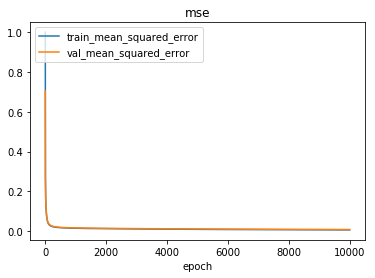

In [14]:
no_hidden_layer = 1
no_hidden_node = 10
lr = 1e-3
decay = 1e-3
batch_size = 8

epochs = 10000


model = Sequential([
    Dense(no_hidden_node, input_dim=7, activation='relu', kernel_initializer='lecun_normal', kernel_regularizer=l2(decay)),
    Dense(1, kernel_initializer='he_normal', kernel_regularizer=l2(decay)),
])

model.compile(optimizer=optimizers.SGD(lr=lr),
              loss='mse')
h = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

plt.figure()
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('mse')
plt.xlabel('epoch')
plt.legend(['train_mean_squared_error', 'val_mean_squared_error',], loc='upper left')
plt.show()

## Q2.Correlation Matrix

In [13]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


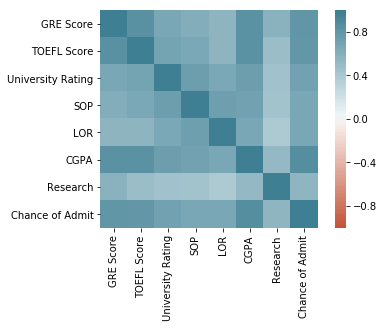

In [41]:


corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# )

In [48]:
#Q2a
max_corr_extent=0
max_corr_index=(-1,-1)
for i in range(len(corr)):
    for j in range(i+1, len(corr)):
        if df.iloc[i,j] > max_corr_extent:
            max_corr_extent = corr.iloc[i,j]
            max_corr_index=(i,j)
            
corr.columns[max_corr_index[0]], corr.columns[max_corr_index[1]], max_corr_extent

('CGPA', 'Chance of Admit', 0.8732890993553011)

In [42]:
#Q2b
related_feature_of_admit = [(corr.columns[i], corr.iloc[-1, i]) for i in (np.argsort(corr.iloc[-1,:-1].tolist())[::-1])]
related_feature_of_admit

[('CGPA', 0.8732890993553011),
 ('GRE Score', 0.8026104595903509),
 ('TOEFL Score', 0.7915939869351035),
 ('University Rating', 0.7112502503917214),
 ('SOP', 0.6757318583886718),
 ('LOR', 0.6698887920106943),
 ('Research', 0.5532021370190388)]

## Q3 Recuisive Feature Elimination

## Q4

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from keras.regularizers import l2
import matplotlib.pyplot as plt
%matplotlib inline

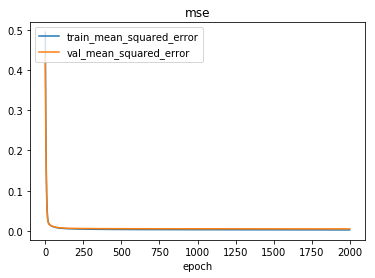

In [60]:
no_hidden_node = 300
epochs=2000

model = Sequential([
    Dense(no_hidden_node, activation='relu', input_dim=7),
    Dense(no_hidden_node, activation='relu'),
    Dense(no_hidden_node, activation='relu'),
    Dense(no_hidden_node, activation='relu'),
    Dense(no_hidden_node, activation='relu'),
    Dense(no_hidden_node, activation='relu'),
    Dense(no_hidden_node, activation='relu'),
    Dense(no_hidden_node, activation='relu'),
    Dense(1, ), #kernel_regularizer=l2(1e-3)
])

model.compile(optimizer=sgd,
              loss='mse')
h = model.fit(X_train, y_train, batch_size=16, epochs=epochs, verbose=0, validation_data=(X_val, y_val))

plt.figure(2)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('mse')
plt.xlabel('epoch')
plt.legend(['train_mean_squared_error', 'val_mean_squared_error',], loc='upper left')
plt.show()

In [8]:
import sklearn.datasets

In [9]:
d = sklearn.datasets.load_boston()

In [11]:
dx = d['data']
dy = d['target']
dx.shape

(506, 13)

In [12]:
dx = scale(dx, 4)

X_train, X_val, y_train, y_val = train_test_split(dx, dy, test_size=0.3, random_state=42)